In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from os import listdir
from numpy import asarray
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from PIL import Image
import os
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [52]:

# load dataset, and save to a new file
from os import listdir
from numpy import asarray
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from PIL import Image
import os.path

# define location of dataset
folder = 'Train/'
photos, labels = list(), list()
data ={}
data['images_count'] = len(listdir(folder))
data['min_width'] =4000
data['max_width'] =0
data['min_height'] =4000
data['max_height'] =0


# enumerate files in the directory
for file in listdir(folder):
    if file ==  '.DS_Store':
        continue
    photo = load_img(folder + file, target_size=(224, 224))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(file.replace('.png',''))
    img = Image.open(folder +file)
    width, height = img.size
    data['min_width'] = min(width, data['min_width'])
    data['max_width'] = max(width, data['max_height'])
    data['min_height'] = min(height, data['min_height'])
    data['max_height'] = max(height, data['max_height'])

# convert to a numpy arrays

#print(photos)

In [53]:
data

{'images_count': 50,
 'min_width': 640,
 'max_width': 3388,
 'min_height': 480,
 'max_height': 2588}

In [54]:
photos = asarray(photos)

(3216, 2136)


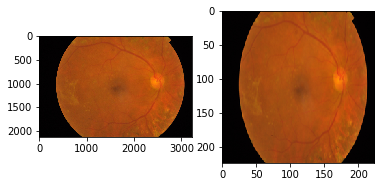

(224, 224, 3)


In [55]:
img = Image.open('Data/train_images/001639a390f0.png') # image extension *.png,*.jpg
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img)
print(img.size)
#plt.imshow(img)
new_width  = 224
new_height = 224
img1 = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save('a1.png') # format may what u want ,*.png,*jpg,*.gif
f.add_subplot(1,2, 2)
plt.imshow(img1)
plt.show(block=True)
photo = img_to_array(img1)
print(photo.shape)

In [5]:
photos[2].shape

(1736, 2416, 3)

In [10]:
photos[3].shape

(1736, 2416, 3)

In [4]:
df =pd.read_csv('./Data/train.csv')

In [9]:
ax = df['diagnosis'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of images for each diagnosis")
ax.set_xlabel("diagnosis")
ax.set_ylabel("Counts")

Text(0, 0.5, 'Counts')

In [10]:
df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [50]:
df.loc[df['diagnosis']==]

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

In [37]:
# example of horizontal shift image augmentation
from numpy import expand_dims
samples = expand_dims(photos[5], 0)

In [42]:
samples.shape

(1, 224, 224, 3)

In [43]:
labels[5]

'73881f55a3ec'

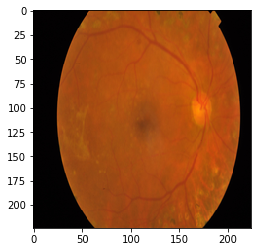

In [56]:
img = Image.open('Train/001639a390f0.png')
img = img.resize((224, 224), Image.ANTIALIAS)
plt.imshow(img)

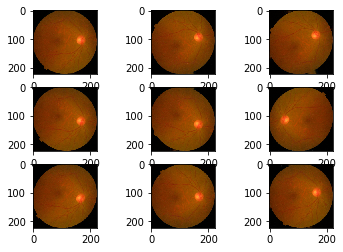

In [45]:
from keras.preprocessing.image import ImageDataGenerator
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0, 
                             height_shift_range=0,  
                             ## Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
                             shear_range=5.0,
                             ## zoom_range: Float or [lower, upper]. 
                             ## Range for random zoom. If a float, 
                             ## [lower, upper] = [1-zoom_range, 1+zoom_range]
                            # zoom_range=[0.6, 1.2], 
                             fill_mode='nearest', 
                             #cval=-2, 
                             horizontal_flip=True, 
                             vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=10)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `item` has been deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


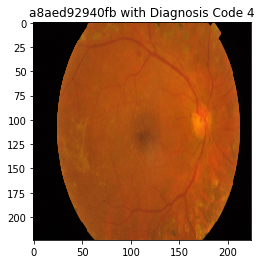

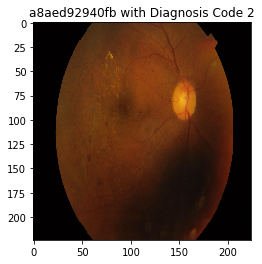

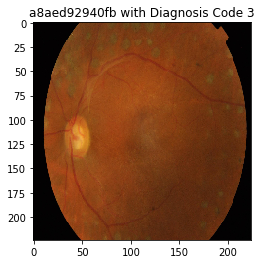

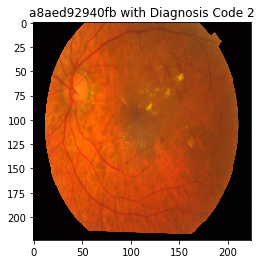

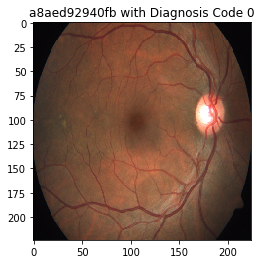

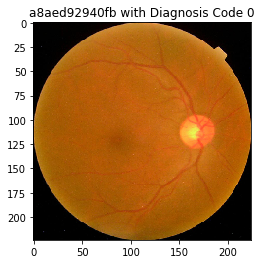

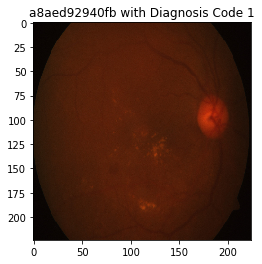

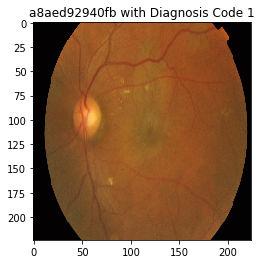

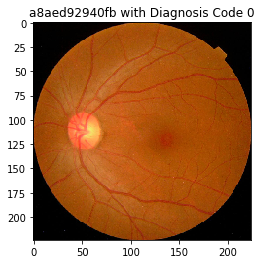

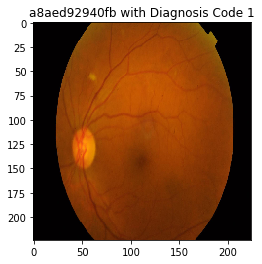

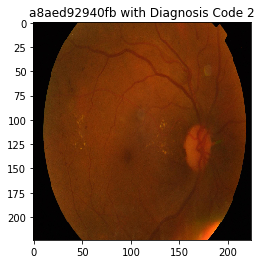

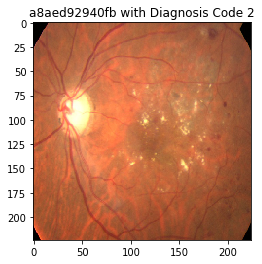

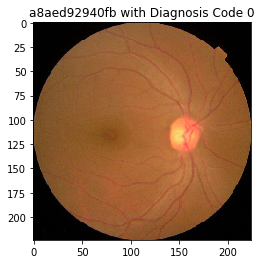

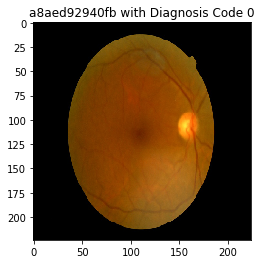

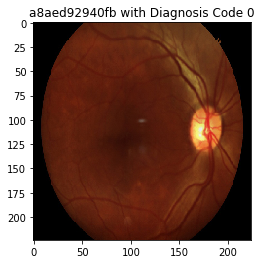

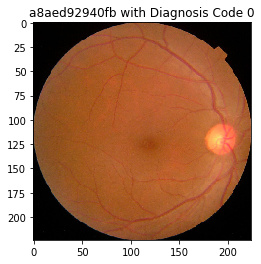

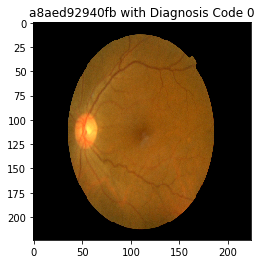

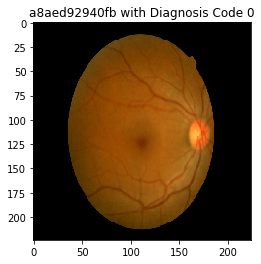

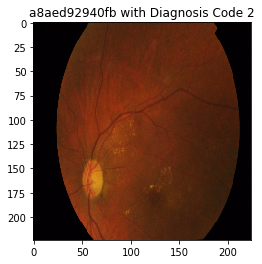

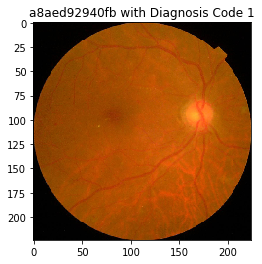

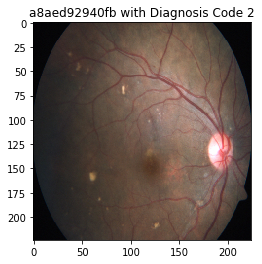

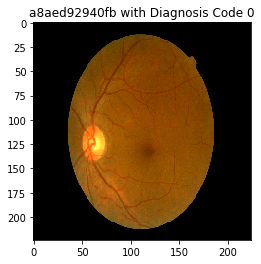

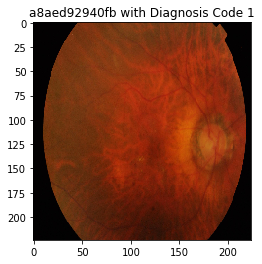

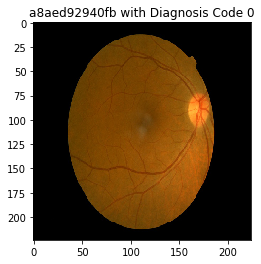

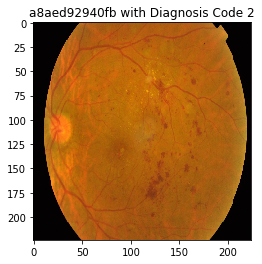

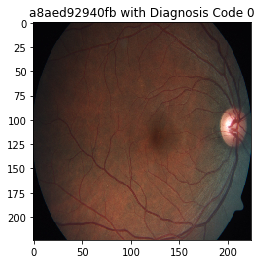

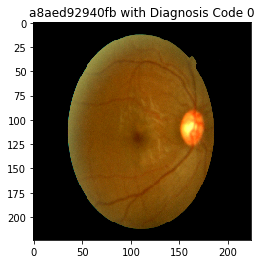

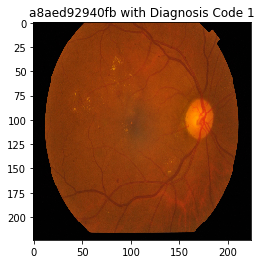

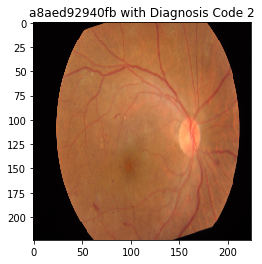

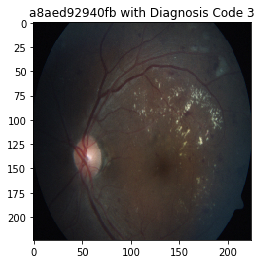

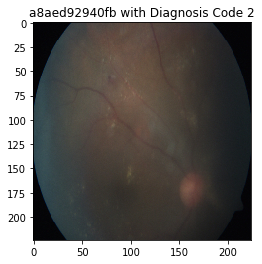

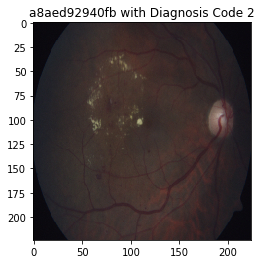

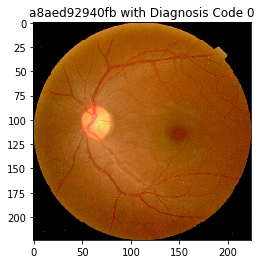

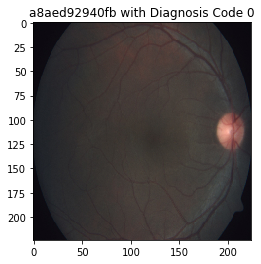

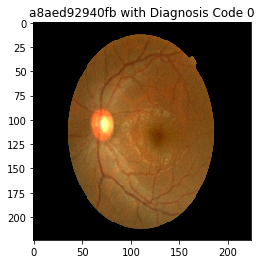

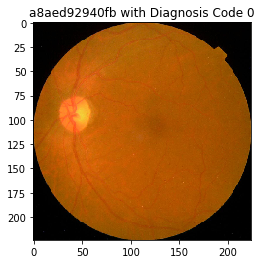

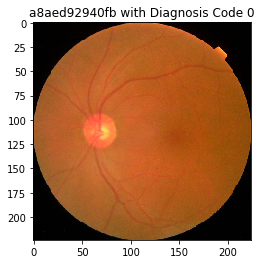

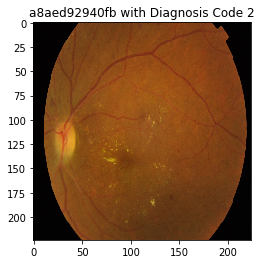

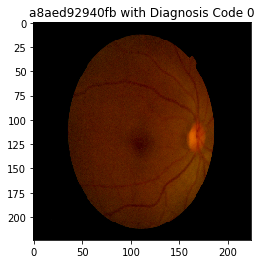

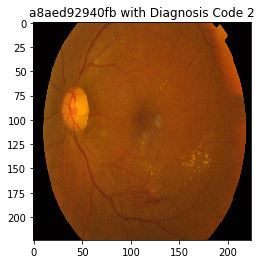

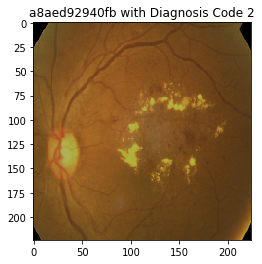

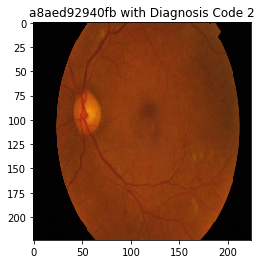

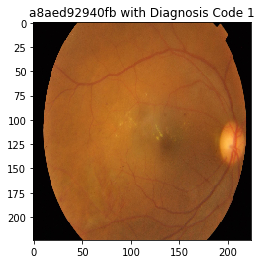

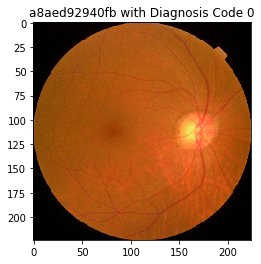

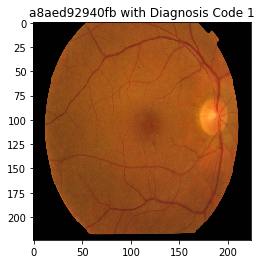

IndexError: index 49 is out of bounds for axis 0 with size 49

In [57]:
for i in range(100):
    plt.imshow(photos[i].astype('uint8'))
    a= df[df['id_code']==labels[i]].diagnosis.astype(str).item()
    plt.title(labels[17]+' with Diagnosis Code ' + a)
    plt.show()